In [1]:
import sys
import os
script_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(script_dir)
sys.path.insert(0, parent_dir)

import cnn_functions
import models
import gradcam
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader

# Binary output

In [2]:
# Use the GPU instead of the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define the label map
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../datasets/cifake/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../datasets/cifake/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda




 - untrained_binary_lr0001_batch4_epochs30

Epoch 1; Train err = 8.77; Val err = 9.02; Loss: 0.4088
Epoch 2; Train err = 7.44; Val err = 7.82; Loss: 0.2542
Epoch 3; Train err = 5.85; Val err = 6.42; Loss: 0.2118
Epoch 4; Train err = 5.38; Val err = 6.35; Loss: 0.1838
Epoch 5; Train err = 4.68; Val err = 6.04; Loss: 0.1646
Epoch 10; Train err = 2.95; Val err = 5.29; Loss: 0.1003
Epoch 15; Train err = 1.31; Val err = 5.12; Loss: 0.0634
Epoch 20; Train err = 1.06; Val err = 5.26; Loss: 0.0437
Epoch 25; Train err = 0.60; Val err = 5.03; Loss: 0.0318
Epoch 30; Train err = 1.90; Val err = 6.63; Loss: 0.0257


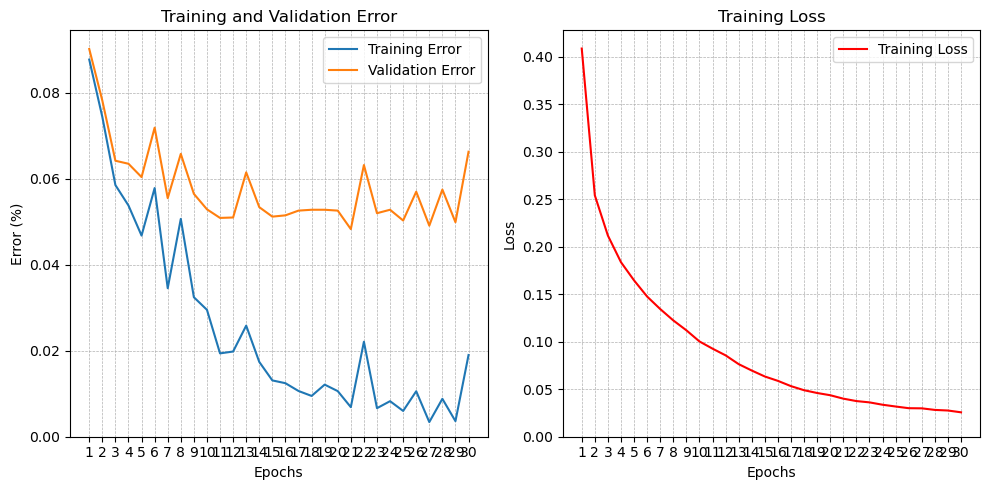



 - untrained_binary_lr0001_batch256_epochs30

Epoch 1; Train err = 10.38; Val err = 12.23; Loss: 0.3464
Epoch 2; Train err = 6.10; Val err = 8.94; Loss: 0.2173
Epoch 3; Train err = 7.47; Val err = 11.03; Loss: 0.1581
Epoch 4; Train err = 5.29; Val err = 10.39; Loss: 0.1150
Epoch 5; Train err = 2.77; Val err = 8.79; Loss: 0.0799
Epoch 10; Train err = 1.86; Val err = 8.23; Loss: 0.0290
Epoch 15; Train err = 0.93; Val err = 7.83; Loss: 0.0204
Epoch 20; Train err = 4.35; Val err = 10.09; Loss: 0.0153
Epoch 25; Train err = 1.34; Val err = 7.81; Loss: 0.0151
Epoch 30; Train err = 1.38; Val err = 7.91; Loss: 0.0103


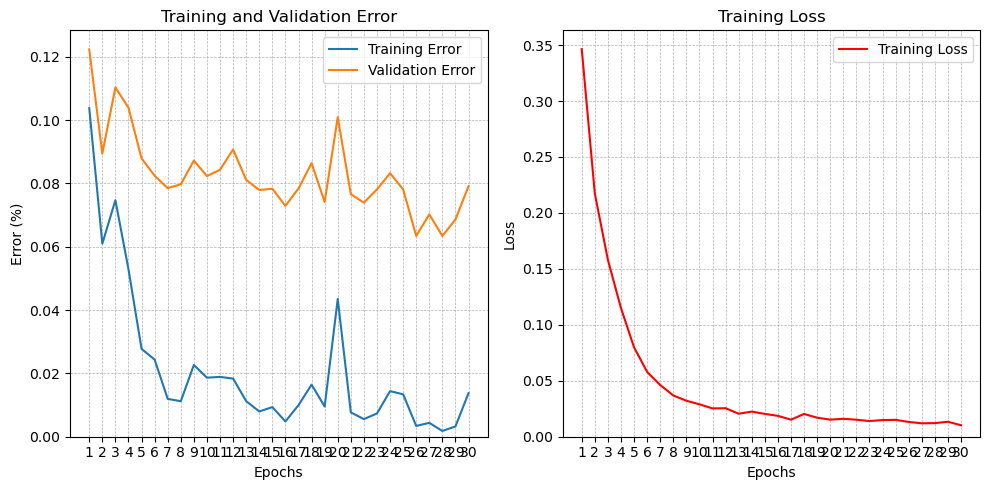



 - untrained_binary_lr0001_batch1024_epochs30

Epoch 1; Train err = 10.93; Val err = 13.37; Loss: 0.3785
Epoch 2; Train err = 6.64; Val err = 11.12; Loss: 0.2300
Epoch 3; Train err = 4.67; Val err = 11.86; Loss: 0.1527
Epoch 4; Train err = 2.28; Val err = 11.32; Loss: 0.0838
Epoch 5; Train err = 1.13; Val err = 10.89; Loss: 0.0462
Epoch 10; Train err = 1.44; Val err = 10.89; Loss: 0.0171
Epoch 15; Train err = 1.26; Val err = 10.79; Loss: 0.0044
Epoch 20; Train err = 0.00; Val err = 9.07; Loss: 0.0001
Epoch 25; Train err = 0.00; Val err = 8.92; Loss: 0.0000
Epoch 30; Train err = 0.00; Val err = 8.91; Loss: 0.0000


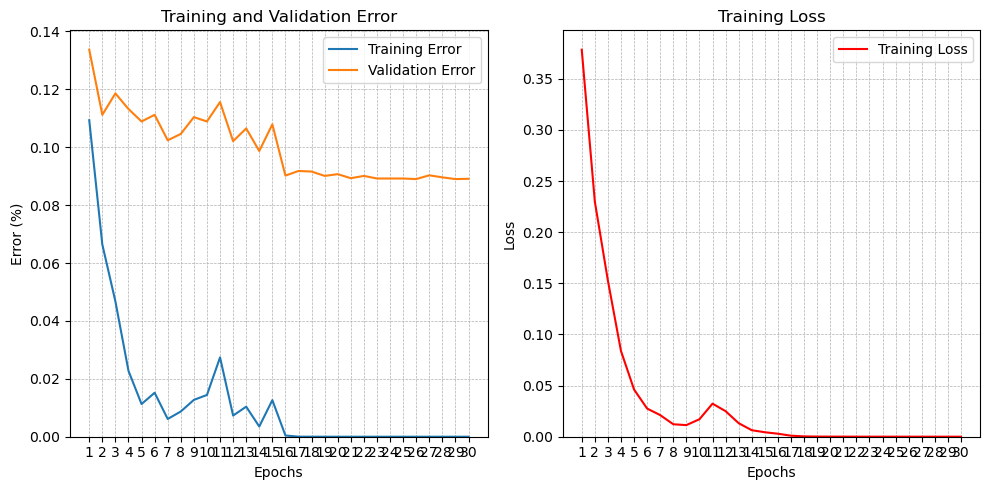



 - untrained_binary_lr-05_batch4_epochs30

Epoch 1; Train err = 19.49; Val err = 20.76; Loss: 0.5727
Epoch 2; Train err = 15.09; Val err = 16.26; Loss: 0.4754
Epoch 3; Train err = 11.87; Val err = 12.74; Loss: 0.3992
Epoch 4; Train err = 10.11; Val err = 11.00; Loss: 0.3381
Epoch 5; Train err = 8.88; Val err = 9.89; Loss: 0.2916
Epoch 10; Train err = 4.92; Val err = 7.30; Loss: 0.1830
Epoch 15; Train err = 3.31; Val err = 6.77; Loss: 0.1229
Epoch 20; Train err = 2.04; Val err = 7.37; Loss: 0.0811
Epoch 25; Train err = 0.73; Val err = 6.46; Loss: 0.0547
Epoch 30; Train err = 0.43; Val err = 6.56; Loss: 0.0387


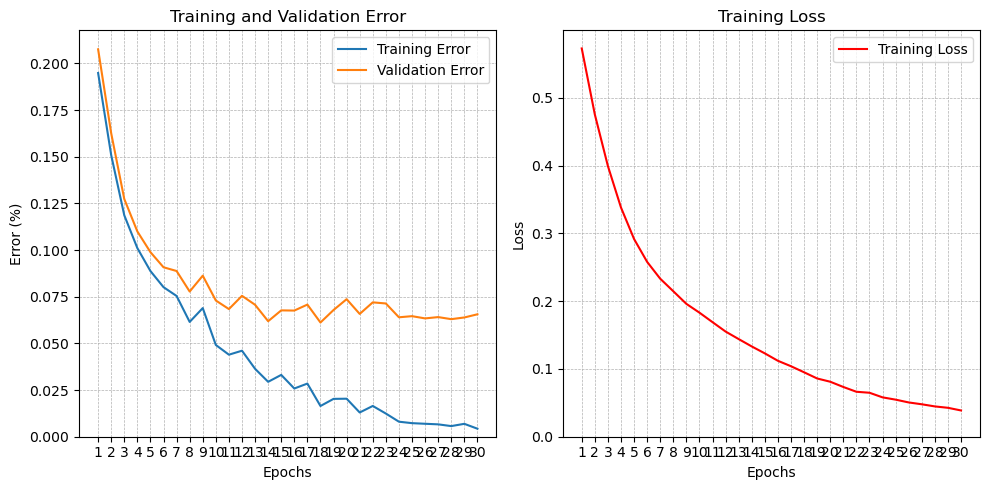



 - untrained_binary_lr-05_batch256_epochs30

Epoch 1; Train err = 17.12; Val err = 19.81; Loss: 0.4937
Epoch 2; Train err = 12.94; Val err = 16.81; Loss: 0.3618
Epoch 3; Train err = 10.11; Val err = 15.42; Loss: 0.2994
Epoch 4; Train err = 7.61; Val err = 14.43; Loss: 0.2523
Epoch 5; Train err = 5.65; Val err = 14.32; Loss: 0.2112
Epoch 10; Train err = 0.07; Val err = 14.27; Loss: 0.0403
Epoch 15; Train err = 0.00; Val err = 14.30; Loss: 0.0079
Epoch 20; Train err = 0.01; Val err = 14.48; Loss: 0.0040
Epoch 25; Train err = 0.01; Val err = 14.13; Loss: 0.0030
Epoch 30; Train err = 0.00; Val err = 13.87; Loss: 0.0025


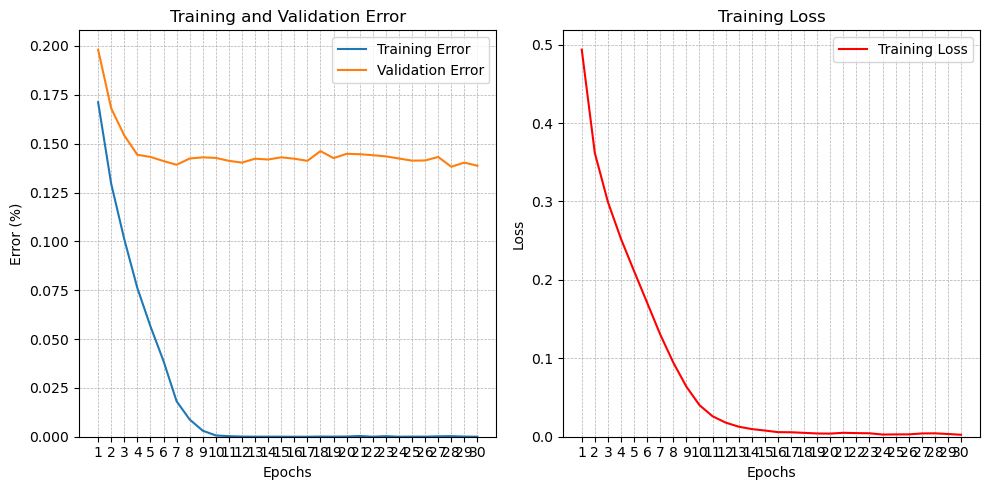



 - untrained_binary_lr-05_batch1024_epochs30

Epoch 1; Train err = 22.11; Val err = 23.96; Loss: 0.5604
Epoch 2; Train err = 17.60; Val err = 20.62; Loss: 0.4342
Epoch 3; Train err = 15.00; Val err = 18.96; Loss: 0.3768
Epoch 4; Train err = 12.98; Val err = 17.52; Loss: 0.3351
Epoch 5; Train err = 11.21; Val err = 16.68; Loss: 0.3014
Epoch 10; Train err = 4.01; Val err = 15.53; Loss: 0.1642
Epoch 15; Train err = 0.29; Val err = 15.45; Loss: 0.0543
Epoch 20; Train err = 0.00; Val err = 15.61; Loss: 0.0134
Epoch 25; Train err = 0.00; Val err = 15.52; Loss: 0.0051
Epoch 30; Train err = 0.00; Val err = 15.56; Loss: 0.0026


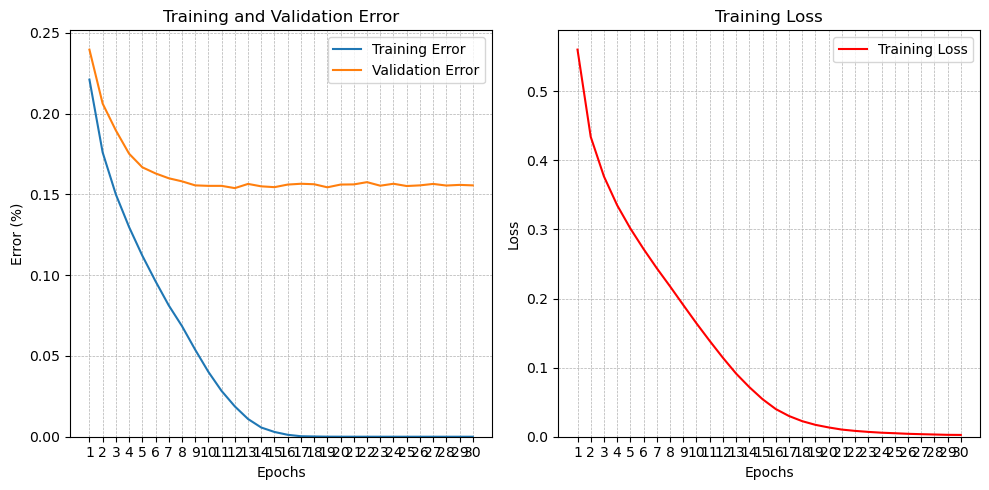

In [ ]:
model_init_function = models.untrained_binary
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [32, 512, 1024]

val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model}_lr{lr:.0e}_batch{batch_size}_epochs{epochs}"
        print("\n\n - " + model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')

### Confusion matrix

Test accuracy: 93.44%


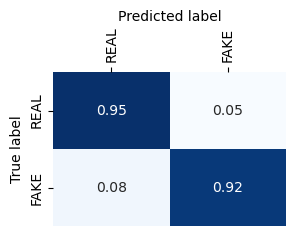

In [3]:
model_init_function = models.binary_finetuning
weights_filename = 'untrained_binary_lr-05_batch4_epochs30.pth'
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (3, 2)

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

# Multiclass model

In [2]:
# Use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

labels_map = {
    0: "REAL Truck",
    1: "REAL Car",
    2: "REAL Bird",
    3: "REAL Cat",
    4: "REAL Deer",
    5: "REAL Dog",
    6: "REAL Frog",
    7: "REAL Horse",
    8: "REAL Ship",
    9: "REAL Plane",
    10: "FAKE Truck",
    11: "FAKE Car",
    12: "FAKE Bird",
    13: "FAKE Cat",
    14: "FAKE Deer",
    15: "FAKE Dog",
    16: "FAKE Frog",
    17: "FAKE Horse",
    18: "FAKE Ship",
    19: "FAKE Plane"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../datasets/cifake/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../datasets/cifake/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda




 - untrained_multiclass_lr0001_batch4_epochs30

Epoch 1; Train err = 39.02; Val err = 39.86; Loss: 1.8890
Epoch 2; Train err = 34.88; Val err = 37.28; Loss: 1.2518
Epoch 3; Train err = 26.47; Val err = 28.70; Loss: 1.0025
Epoch 4; Train err = 22.87; Val err = 26.21; Loss: 0.8667
Epoch 5; Train err = 21.78; Val err = 25.03; Loss: 0.7653
Epoch 10; Train err = 15.91; Val err = 24.37; Loss: 0.4857
Epoch 15; Train err = 21.53; Val err = 32.81; Loss: 0.3295
Epoch 20; Train err = 5.99; Val err = 21.03; Loss: 0.2260
Epoch 25; Train err = 5.25; Val err = 20.94; Loss: 0.1654
Epoch 30; Train err = 2.87; Val err = 20.15; Loss: 0.1295


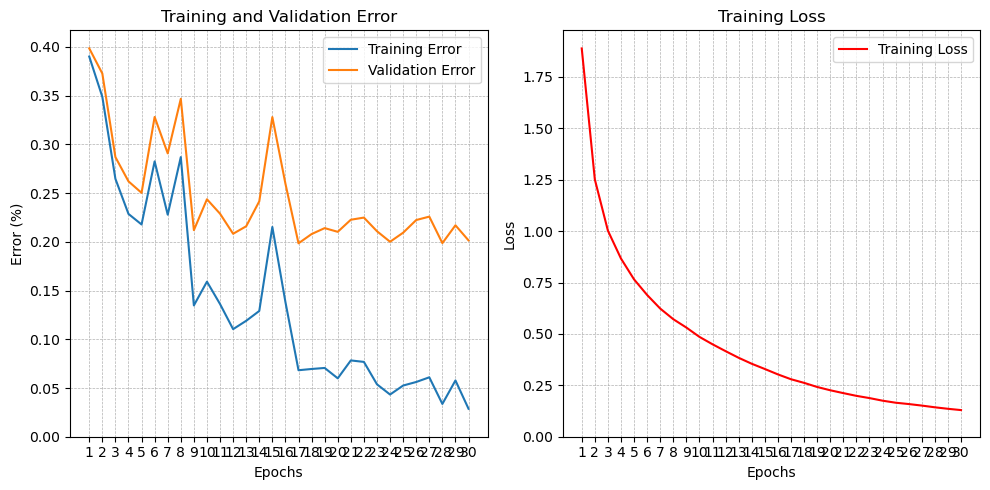



 - untrained_multiclass_lr0001_batch256_epochs30

Epoch 1; Train err = 35.65; Val err = 40.46; Loss: 1.5658
Epoch 2; Train err = 31.36; Val err = 37.48; Loss: 1.0209
Epoch 3; Train err = 21.37; Val err = 32.83; Loss: 0.8023
Epoch 4; Train err = 16.35; Val err = 31.35; Loss: 0.6316
Epoch 5; Train err = 13.13; Val err = 31.83; Loss: 0.4862
Epoch 10; Train err = 5.38; Val err = 32.50; Loss: 0.1049
Epoch 15; Train err = 4.67; Val err = 32.13; Loss: 0.0689
Epoch 20; Train err = 2.19; Val err = 30.20; Loss: 0.0638
Epoch 25; Train err = 1.41; Val err = 29.20; Loss: 0.0489
Epoch 30; Train err = 1.18; Val err = 29.08; Loss: 0.0348


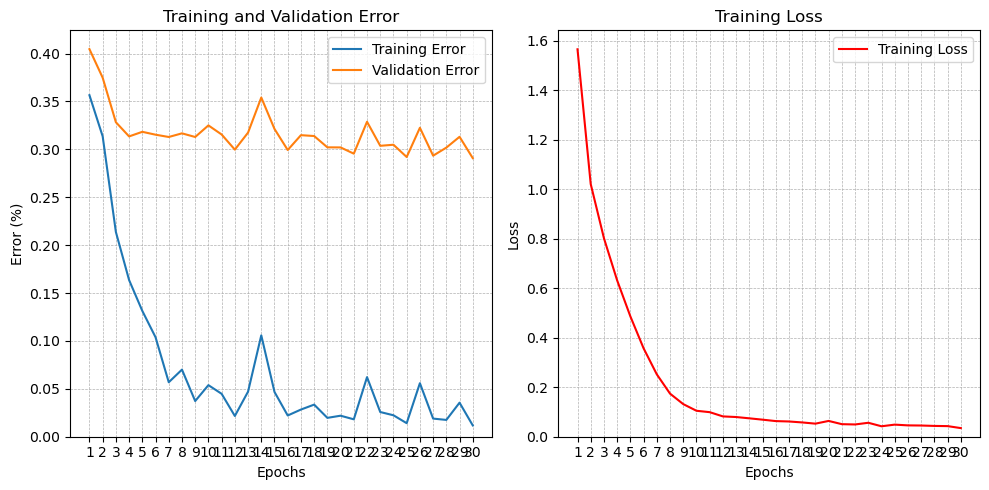



 - untrained_multiclass_lr0001_batch1024_epochs30

Epoch 1; Train err = 45.67; Val err = 48.86; Loss: 1.8891
Epoch 2; Train err = 34.54; Val err = 41.20; Loss: 1.2522
Epoch 3; Train err = 27.35; Val err = 38.45; Loss: 0.9883
Epoch 4; Train err = 20.59; Val err = 36.32; Loss: 0.7878
Epoch 5; Train err = 14.49; Val err = 36.09; Loss: 0.6083
Epoch 10; Train err = 0.24; Val err = 36.22; Loss: 0.0416
Epoch 15; Train err = 0.00; Val err = 35.02; Loss: 0.0040
Epoch 20; Train err = 0.00; Val err = 35.13; Loss: 0.0018
Epoch 25; Train err = 0.00; Val err = 35.09; Loss: 0.0010
Epoch 30; Train err = 0.00; Val err = 35.14; Loss: 0.0007


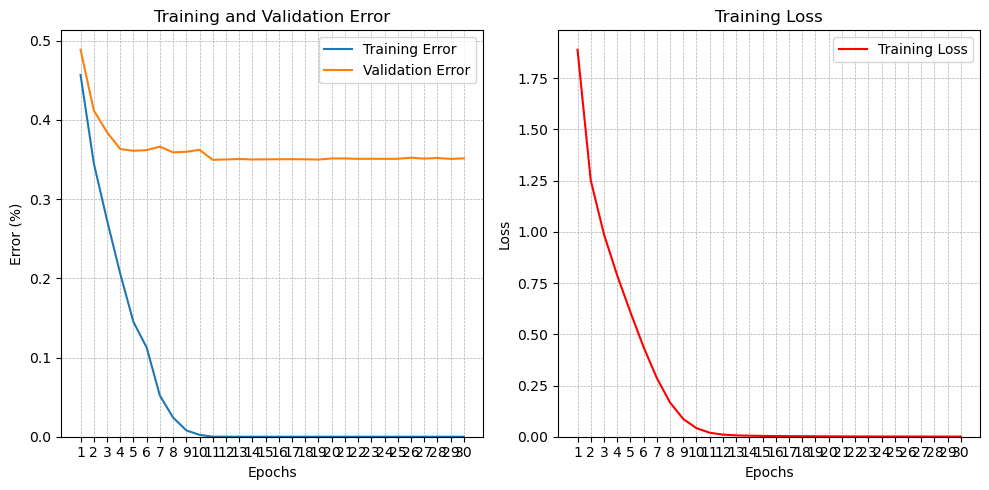



 - untrained_multiclass_lr-05_batch4_epochs30

Epoch 1; Train err = 58.15; Val err = 58.60; Loss: 2.4007
Epoch 2; Train err = 51.28; Val err = 51.87; Loss: 1.9956
Epoch 3; Train err = 45.92; Val err = 47.40; Loss: 1.8116
Epoch 4; Train err = 42.05; Val err = 43.75; Loss: 1.6674
Epoch 5; Train err = 39.51; Val err = 41.43; Loss: 1.5570
Epoch 10; Train err = 29.76; Val err = 33.62; Loss: 1.1744
Epoch 15; Train err = 23.20; Val err = 28.90; Loss: 0.9458
Epoch 20; Train err = 19.62; Val err = 27.25; Loss: 0.7840
Epoch 25; Train err = 16.52; Val err = 26.36; Loss: 0.6550
Epoch 30; Train err = 12.70; Val err = 25.08; Loss: 0.5483


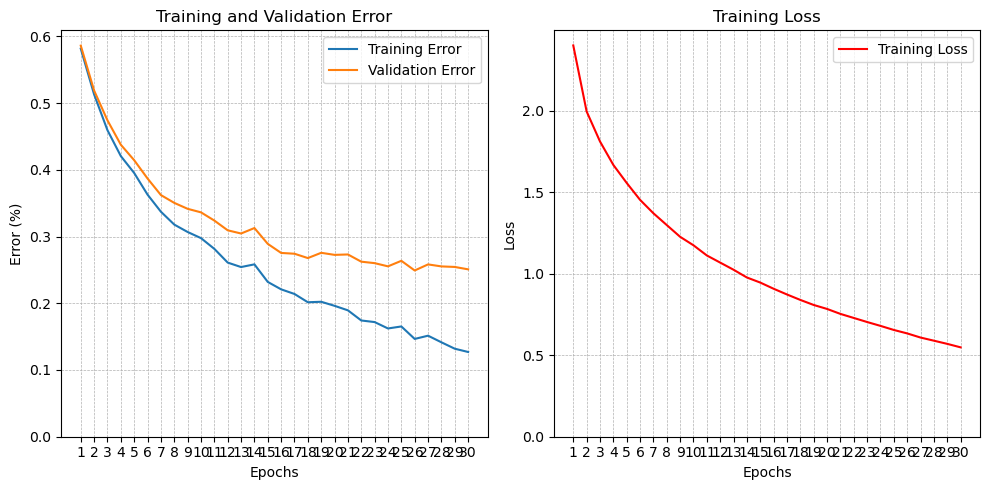



 - untrained_multiclass_lr-05_batch256_epochs30

Epoch 1; Train err = 62.04; Val err = 62.98; Loss: 2.4453
Epoch 2; Train err = 52.43; Val err = 55.19; Loss: 1.8403
Epoch 3; Train err = 46.56; Val err = 50.66; Loss: 1.5843
Epoch 4; Train err = 42.24; Val err = 47.54; Loss: 1.4236
Epoch 5; Train err = 38.68; Val err = 45.41; Loss: 1.3043
Epoch 10; Train err = 24.67; Val err = 41.12; Loss: 0.8991
Epoch 15; Train err = 13.02; Val err = 40.03; Loss: 0.5957
Epoch 20; Train err = 4.20; Val err = 40.25; Loss: 0.3358
Epoch 25; Train err = 0.49; Val err = 40.96; Loss: 0.1520
Epoch 30; Train err = 0.03; Val err = 41.28; Loss: 0.0586


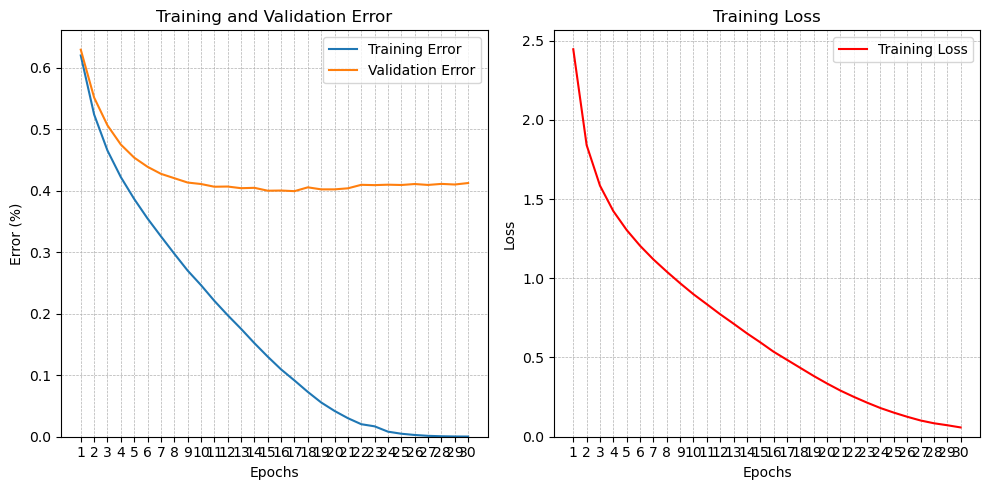



 - untrained_multiclass_lr-05_batch1024_epochs30

Epoch 1; Train err = 73.80; Val err = 75.01; Loss: 2.7758
Epoch 2; Train err = 62.78; Val err = 65.27; Loss: 2.2083
Epoch 3; Train err = 57.05; Val err = 59.83; Loss: 1.9281
Epoch 4; Train err = 52.97; Val err = 56.55; Loss: 1.7518
Epoch 5; Train err = 49.59; Val err = 53.91; Loss: 1.6251
Epoch 10; Train err = 38.48; Val err = 46.45; Loss: 1.2515
Epoch 15; Train err = 30.32; Val err = 43.39; Loss: 1.0171
Epoch 20; Train err = 22.84; Val err = 41.86; Loss: 0.8180
Epoch 25; Train err = 15.87; Val err = 41.78; Loss: 0.6361
Epoch 30; Train err = 9.42; Val err = 41.73; Loss: 0.4679


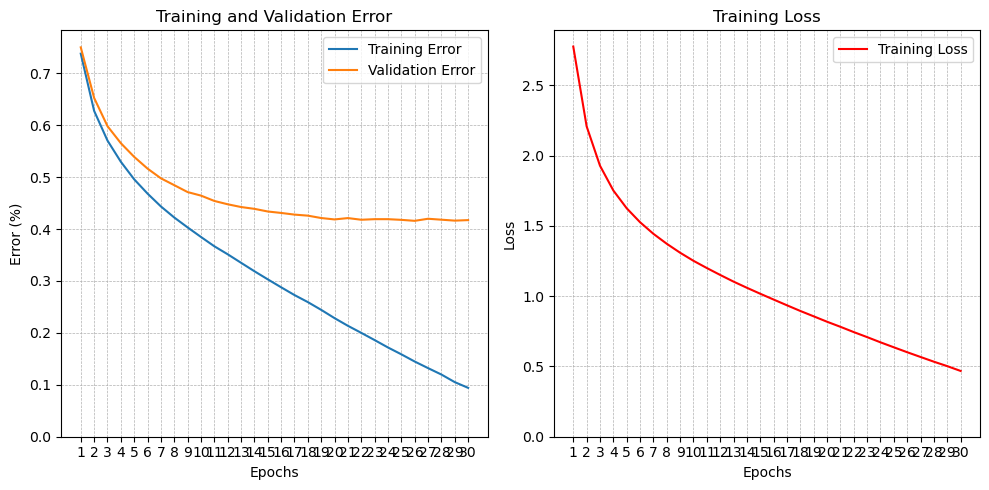

In [ ]:
model_init_function = models.untrained_multiclass
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [32, 512, 1024]

val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model}_lr{lr:.0e}_batch{batch_size}_epochs{epochs}"
        print("\n\n - " + model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')

## Confusion matrix

Test accuracy: 79.85%


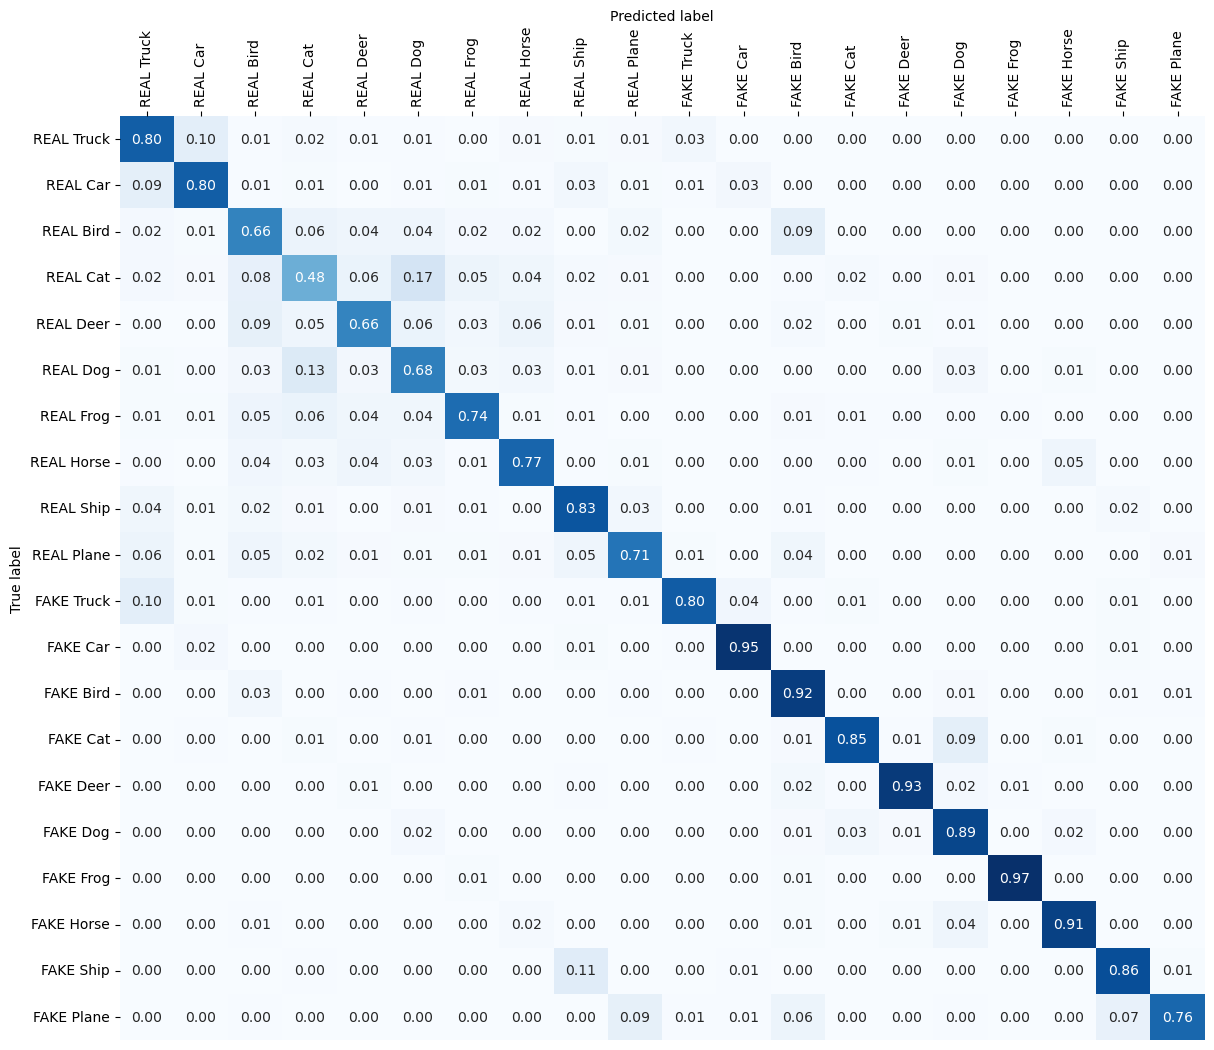

In [6]:
model_init_function = models.multiclass_finetuning
weights_filename = 'untrained_multiclass_lr0001_batch4_epochs30.pth'
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (14, 12)

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

Forward hook running...
Activations size: torch.Size([1, 64, 8, 8])
Backward hook running...
Gradients size: torch.Size([1, 64, 8, 8])


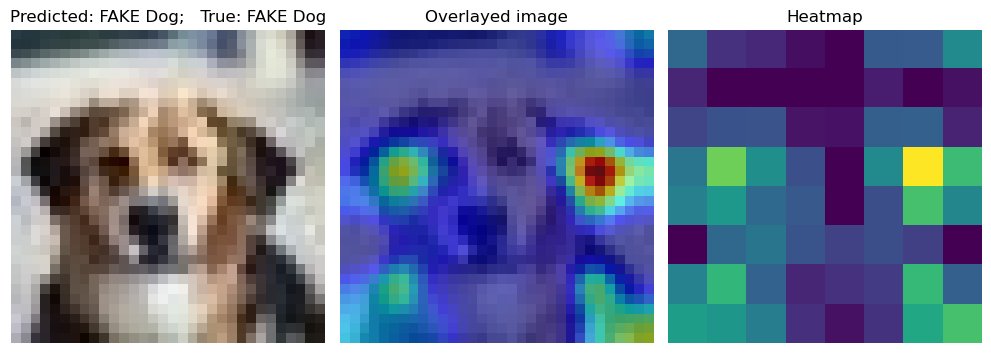

In [23]:
model = models.untrained_multiclass()
model.load_state_dict(torch.load('./weights/untrained_multiclass_lr0001_batch4_epochs30.pth'))
sample_idx = torch.randint(len(train_ds), size=(1,)).item()

gradcam.plot_gradcam(model, model.layer1, train_ds, labels_map, sample_idx)